<a href="https://colab.research.google.com/github/HugoSilvaRodrigues/Embarcados/blob/main/Codigos/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("/content/drive/MyDrive/EMBARCADOS/dados.csv")

In [4]:
data.isna().sum()

created_at     0
temperatura    2
pressao        2
altitude       2
humidade       2
chuva          0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744 entries, 0 to 3745
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   3744 non-null   object 
 1   temperatura  3744 non-null   float64
 2   pressao      3744 non-null   float64
 3   altitude     3744 non-null   float64
 4   humidade     3744 non-null   float64
 5   chuva        3744 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 204.8+ KB


In [7]:
data.skew(axis = 0)

<ipython-input-7-f2bc939b9126>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew(axis = 0)


temperatura   -0.719357
pressao        0.342072
altitude      -0.329765
humidade       0.637869
chuva          0.504855
dtype: float64

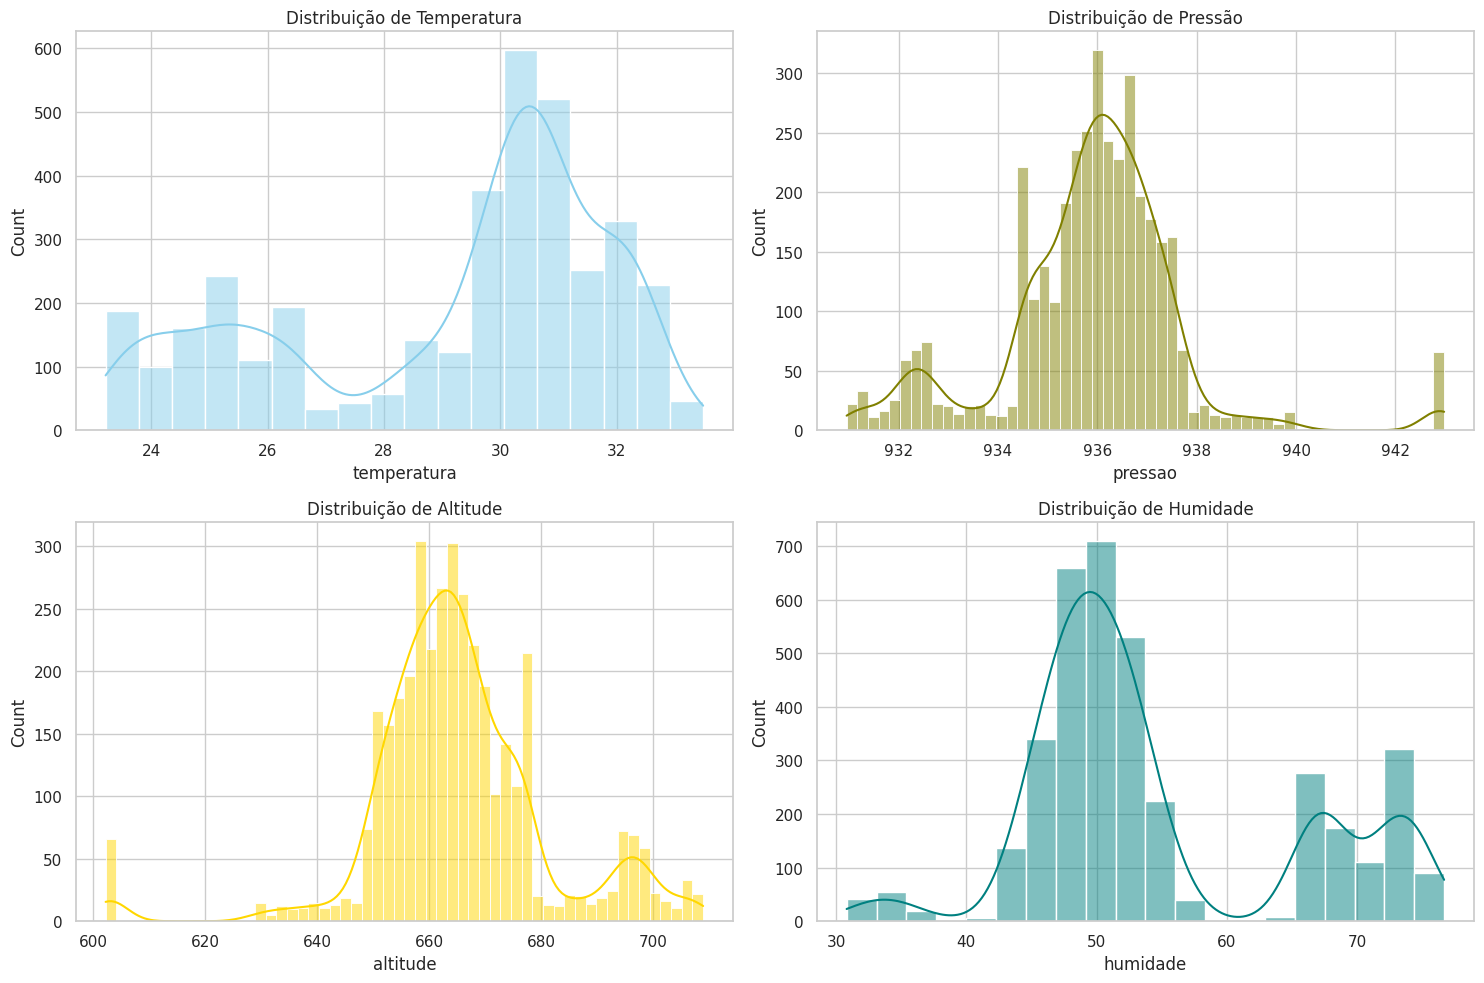

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution plots for each variable
sns.histplot(data['temperatura'], ax=axes[0,0], kde=True, color='skyblue')
axes[0,0].set_title('Distribuição de Temperatura')

sns.histplot(data['pressao'], ax=axes[0,1], kde=True, color='olive')
axes[0,1].set_title('Distribuição de Pressão')

sns.histplot(data['altitude'], ax=axes[1,0], kde=True, color='gold')
axes[1,0].set_title('Distribuição de Altitude')

sns.histplot(data['humidade'], ax=axes[1,1], kde=True, color='teal')
axes[1,1].set_title('Distribuição de Humidade')

plt.tight_layout()

plt.show()

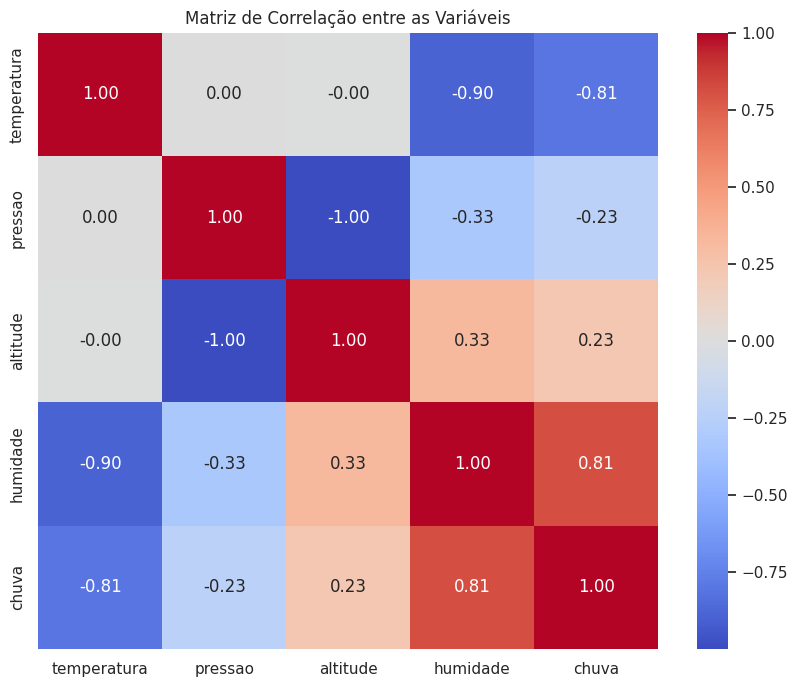

In [9]:
corr= data.drop(columns=['created_at']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

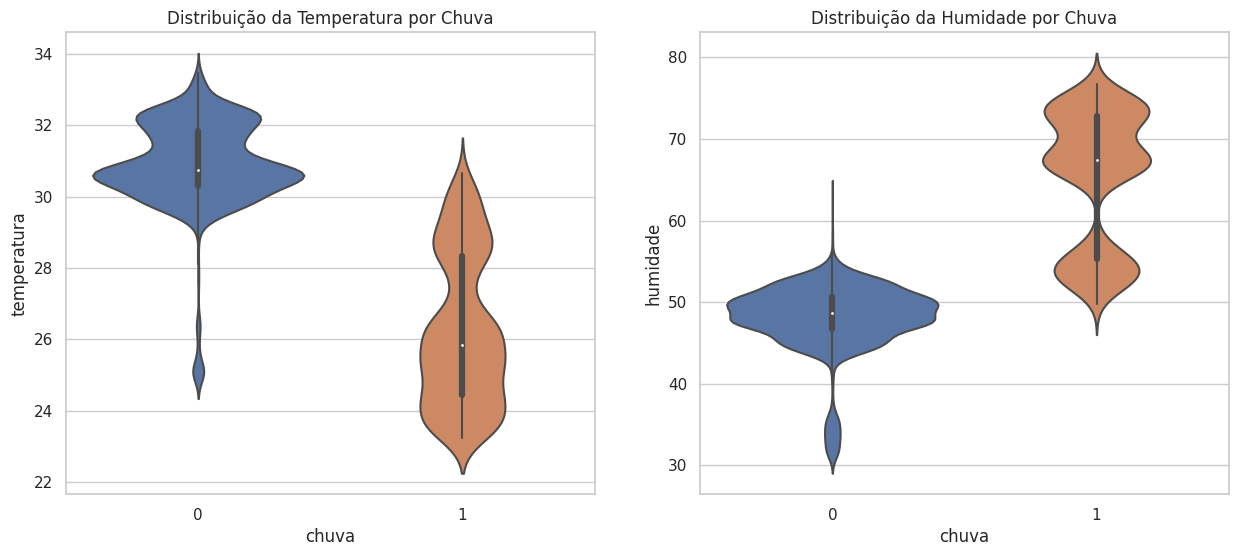

In [10]:
plt.figure(figsize=(15, 6))

# Violin plot for Temperature by Rain
plt.subplot(1, 2, 1)
sns.violinplot(x='chuva', y='temperatura', data=data)
plt.title('Distribuição da Temperatura por Chuva')

# Violin plot for Humidity by Rain
plt.subplot(1, 2, 2)
sns.violinplot(x='chuva', y='humidade', data=data)
plt.title('Distribuição da Humidade por Chuva')

plt.show()

In [11]:
from datetime import datetime

def day_or_night(hour):
    return 'day' if 6 <= hour < 18 else 'night'

data['created_at'] = pd.to_datetime(data['created_at'])
data['hour'] = data['created_at'].dt.hour
data['day_night'] = data['hour'].apply(day_or_night)
data[['created_at', 'day_night']].head()

,created_at,day_night
0,2023-10-21 14:09:28+00:00,day
1,2023-10-21 14:09:59+00:00,day
2,2023-10-21 14:10:29+00:00,day
3,2023-10-21 14:11:00+00:00,day
4,2023-10-21 14:11:31+00:00,day


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3744 entries, 0 to 3745
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   created_at   3744 non-null   datetime64[ns, UTC]
 1   temperatura  3744 non-null   float64            
 2   pressao      3744 non-null   float64            
 3   altitude     3744 non-null   float64            
 4   humidade     3744 non-null   float64            
 5   chuva        3744 non-null   int64              
 6   hour         3744 non-null   int64              
 7   day_night    3744 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(1)
memory usage: 263.2+ KB


<Axes: xlabel='day_night', ylabel='Count'>

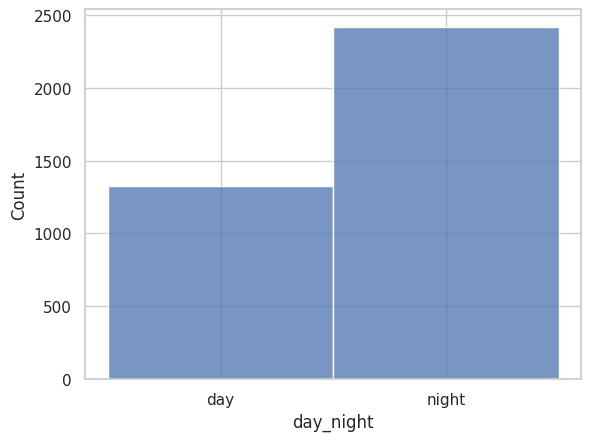

In [13]:
sns.histplot(data['day_night'])


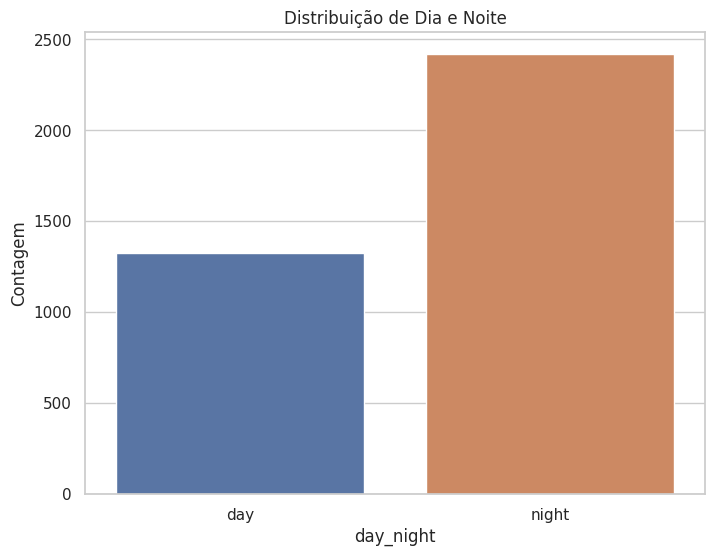

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='day_night', data=data)
plt.title('Distribuição de Dia e Noite')
plt.ylabel('Contagem')
plt.show()

In [15]:
data=pd.get_dummies(data)


data = data.drop(columns=['created_at','hour'])
caminho_arquivo_csv = "dados_day_night.csv"
data.to_csv(caminho_arquivo_csv, index=False)



In [16]:
print(data)

      temperatura    pressao   altitude  humidade  chuva  day_night_day  \
0           26.30  942.98065  602.18903  51.05664      0              1   
1           26.34  942.92267  602.70068  51.63965      0              1   
2           26.47  942.93909  602.55573  51.57324      0              1   
3           26.46  942.93341  602.60577  50.70605      0              1   
4           26.45  942.86792  603.18359  50.78516      0              1   
...           ...        ...        ...       ...    ...            ...   
3741        25.12  932.91046  691.44061  74.06543      1              0   
3742        25.10  932.88873  691.63416  74.09473      1              0   
3743        25.12  932.84888  691.98901  74.07520      1              0   
3744        25.10  932.90216  691.51428  73.89063      1              0   
3745        25.11  932.89667  691.69757  73.83398      1              0   

      day_night_night  
0                   0  
1                   0  
2                   0  
3  

In [17]:
X = data.drop('chuva', axis=1)
y = data['chuva']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = RandomForestClassifier(random_state=1)

cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Accuracy on test set: 0.9991103202846975
Precision: 1.0
Recall: 0.9975550122249389
F1 Score: 0.9987760097919216
Cross-validation scores: [1.        0.9980916 1.        1.        0.9980916]
Average cross-validation score: 0.9992366412213741


In [18]:
X = data.drop('chuva', axis=1)
y = data['chuva']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

evaluation_metrics = {}


for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    evaluation_metrics[name] = {
        "Cross-Validation Score": cv_scores.mean(),
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Display the results
for name, metrics in evaluation_metrics.items():
    print(f"{name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

Logistic Regression Evaluation Metrics:
Cross-Validation Score: 0.9809160305343513
Accuracy: 0.9795373665480427
Precision: 0.9795428166194785
Recall: 0.9795373665480427
F1 Score: 0.97949889618542


Naive Bayes Evaluation Metrics:
Cross-Validation Score: 0.9003816793893129
Accuracy: 0.8941281138790036
Precision: 0.8982716155249706
Recall: 0.8941281138790036
F1 Score: 0.8913321040807393


Support Vector Machine Evaluation Metrics:
Cross-Validation Score: 0.9969465648854963
Accuracy: 0.998220640569395
Precision: 0.9982256039150872
Recall: 0.998220640569395
F1 Score: 0.9982197025512923


